In [1]:
import pandas as  pd
import sqlite3

In [2]:
conn= sqlite3.connect("factbook.db")

In [3]:
q= "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
cursor= conn.cursor()
cursor.execute(q).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [5]:
q1= "select * from facts limit 5 "
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
q2= " select min(population) min_pop, max(population) max_pop, min(population_growth) min_growth, max(population_growth) max_growth from facts"
pd.read_sql_query(q2,conn)

,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


In [12]:
q3= "select * from facts where population == (select max(population) from facts) or population==(select min(population) from facts)"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


In [15]:
q4= "select * from facts where population==0 or population== 7256490011"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


The max population and min population values show the useless data to analyze.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69e6a6a5f8>,
      dtype=object)

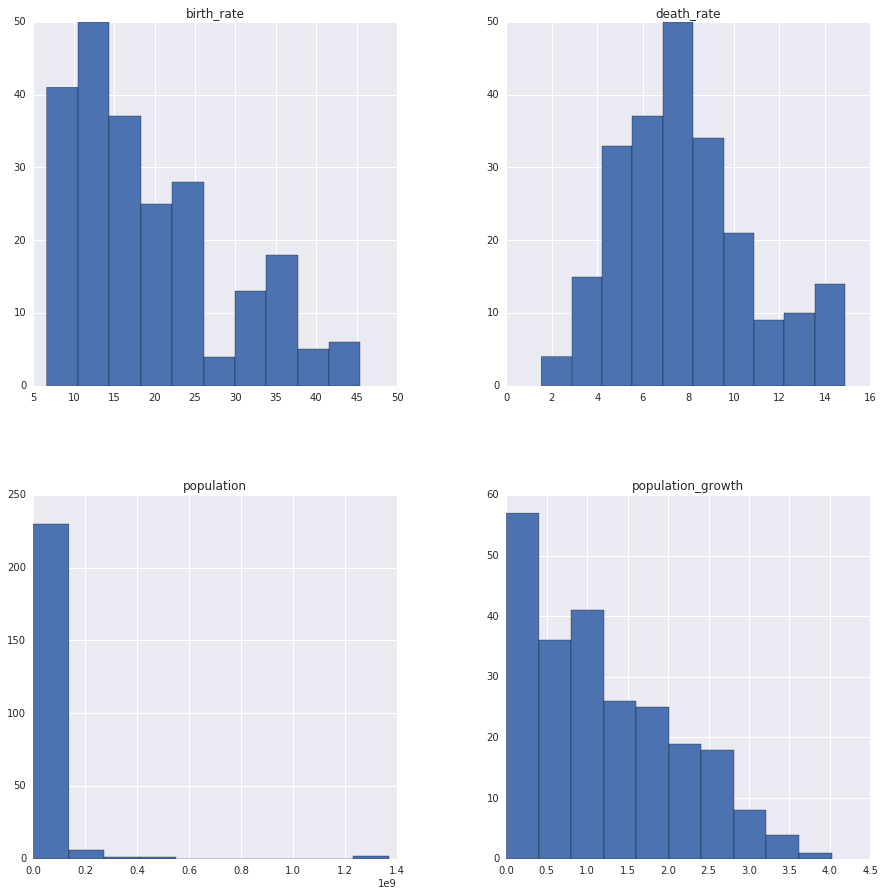

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig= plt.figure(figsize=(15,15))
ax= fig.add_subplot(111)

q5= "select population, population_growth, birth_rate, death_rate from facts where population != 0 and population !=7256490011 "
pd.read_sql_query(q5,conn).hist(ax=ax)


In [17]:
q6="select name country, cast(population as float)/cast(area as float) density from facts where population != 0 and population!=7256490011 "
pd.read_sql_query(q6,conn)

,country,density
0,Afghanistan,49.927697
1,Albania,105.373522
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841
5,Antigua and Barbuda,209.131222
6,Argentina,15.620733
7,Armenia,102.759708
8,Australia,2.938944
9,Austria,103.319979


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69e45c79b0>]],
      dtype=object)

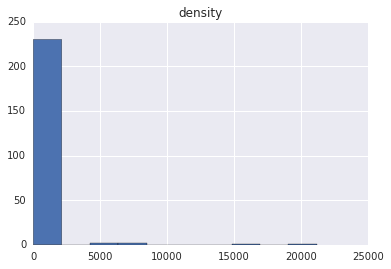

In [21]:
pd.read_sql_query(q6,conn).hist()

In [ ]:
q